# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

In [1]:
# %pip install --upgrade plotly

## Import Statements

In [107]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

## Notebook Presentation

In [108]:
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use("fivethirtyeight")

## Load the Data

In [109]:
df_hh_income = pd.read_csv('data/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('data/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('data/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('data/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('data/Deaths_by_Police_US.csv', encoding="windows-1252")

In [110]:
# df_pct_completed_hs.head()

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [111]:
print(f'Median Household Income 2015 dataframe "df_hh_income" shape : {df_hh_income.shape}\n')
print(f'Percentage of People Below Poverty level dataframe "df_pct_poverty" shape : {df_pct_poverty.shape}\n')
print(f'Percentage of People Over 25 Completed High School dataframe "df_pct_completed_hs" shape : {df_pct_completed_hs.shape}\n')
print(f'Share of Race by City "df_share_race_city" dataframe shape : {df_share_race_city.shape}\n')
print(f'Deaths by Police US "df_fatalities" dataframe shape {df_fatalities.shape}\n')

Median Household Income 2015 dataframe "df_hh_income" shape : (29322, 3)

Percentage of People Below Poverty level dataframe "df_pct_poverty" shape : (29329, 3)

Percentage of People Over 25 Completed High School dataframe "df_pct_completed_hs" shape : (29329, 3)

Share of Race by City "df_share_race_city" dataframe shape : (29268, 7)

Deaths by Police US "df_fatalities" dataframe shape (2535, 14)



In [112]:
print(f'df_hh_income column names and the corresponding null values count : {dict(df_hh_income.isnull().sum())}\n')
print(f'df_pct_poverty column names and the corresponding null values count : {dict(df_pct_poverty.isnull().sum())}\n')
print(f'df_pct_completed_hs column names and the corresponding null values count : {dict(df_pct_completed_hs.isnull().sum())}\n')
print(f'df_share_race_city column names and the corresponding null values count : \n{dict(df_share_race_city.isnull().sum())}\n')
print(f'df_fatalities column names and the corresponding null values count : \n{dict(df_fatalities.isnull().sum())}\n')

df_hh_income column names and the corresponding null values count : {'Geographic Area': 0, 'City': 0, 'Median Income': 51}

df_pct_poverty column names and the corresponding null values count : {'Geographic Area': 0, 'City': 0, 'poverty_rate': 0}

df_pct_completed_hs column names and the corresponding null values count : {'Geographic Area': 0, 'City': 0, 'percent_completed_hs': 0}

df_share_race_city column names and the corresponding null values count : 
{'Geographic area': 0, 'City': 0, 'share_white': 0, 'share_black': 0, 'share_native_american': 0, 'share_asian': 0, 'share_hispanic': 0}

df_fatalities column names and the corresponding null values count : 
{'id': 0, 'name': 0, 'date': 0, 'manner_of_death': 0, 'armed': 9, 'age': 77, 'gender': 0, 'race': 195, 'city': 0, 'state': 0, 'signs_of_mental_illness': 0, 'threat_level': 0, 'flee': 65, 'body_camera': 0}



In [113]:
duplicate = df_hh_income[df_hh_income.duplicated()]
print(f"Number of Duplicate Rows in df_hh_income is : {len(duplicate)}")

duplicate = df_pct_poverty[df_pct_poverty.duplicated()]
print(f"Number of Duplicate Rows in df_pct_poverty is : {len(duplicate)}")

duplicate = df_pct_completed_hs[df_pct_completed_hs.duplicated()]
print(f"Number of Duplicate Rows in df_pct_completed_hs is : {len(duplicate)}")

duplicate = df_share_race_city[df_share_race_city.duplicated()]
print(f"Number of Duplicate Rows in df_share_race_city is : {len(duplicate)}")

duplicate = df_fatalities[df_fatalities.duplicated()]
print(f"Number of Duplicate Rows in df_fatalities is : {len(duplicate)}")

Number of Duplicate Rows in df_hh_income is : 0
Number of Duplicate Rows in df_pct_poverty is : 0
Number of Duplicate Rows in df_pct_completed_hs is : 0
Number of Duplicate Rows in df_share_race_city is : 0
Number of Duplicate Rows in df_fatalities is : 0


In [114]:
df_hh_income.head()

Geographic Area             City Median Income
0              AL       Abanda CDP         11207
1              AL   Abbeville city         25615
2              AL  Adamsville city         42575
3              AL     Addison town         37083
4              AL       Akron town         21667

In [115]:
df_pct_poverty.head()

Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5
3              AL     Addison town         30.7
4              AL       Akron town           42

In [116]:
df_pct_completed_hs.tail()

Geographic Area                    City percent_completed_hs
29324              WY  Woods Landing-Jelm CDP                  100
29325              WY            Worland city                 85.6
29326              WY             Wright town                 89.2
29327              WY              Yoder town                 79.4
29328              WY           Y-O Ranch CDP                  100

In [117]:
df_share_race_city.head()

Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   
3              AL     Addison town        99.1         0.1   
4              AL       Akron town        13.2        86.5   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3  
3                     0         0.1            0.4  
4                     0           0            0.3

In [118]:
df_fatalities.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

## Data Cleaning - Check for Missing Values and Duplicates

In [120]:
# Function that removes non digital characters from strings
def remove_non_digit(x):
    mylist = ['(X)', '-', '()',',','+']
    if not str(x).isdigit():
        for c in mylist:
            x = str(x).replace(c, '')
    return x 

In [121]:
# Substitut null values with 0.
df_hh_income.fillna('0', inplace=True)

In [122]:
# Remove non digit characters
df_hh_income['Median Income'] = df_hh_income['Median Income'].apply(remove_non_digit)
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].apply(remove_non_digit)
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].apply(remove_non_digit)
df_fatalities['age'] = df_fatalities['age'].apply(remove_non_digit)

In [123]:
# Replace empty strings with 0
df_hh_income.loc[(df_hh_income['Median Income'] == ''), "Median Income"] = "0"
df_pct_poverty.loc[(df_pct_poverty['poverty_rate'] == ''), "poverty_rate"] = "0"
df_pct_completed_hs.loc[(df_pct_completed_hs['percent_completed_hs'] == ''), "percent_completed_hs"] = "0"
df_fatalities.loc[(df_fatalities['age'] == ''), "age"] = np.nan
df_fatalities.loc[(df_fatalities['race'].isna()), "race"] = "unknown"

In [124]:
# Cast as float
df_hh_income['Median Income'] = df_hh_income['Median Income'].astype("float")
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype("float")
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype("float")
df_fatalities['age'] = df_fatalities['age'].astype("float")

In [125]:
# A for loop over numeric columns
for col_name in df_share_race_city.columns:
    if 'share' in col_name:
        # Remove non digit characters
        df_share_race_city[col_name] = df_share_race_city[col_name].apply(remove_non_digit)
        # Replace empty strings with 0
        df_share_race_city.loc[(df_share_race_city[col_name] == ''), col_name] = "0"
        # Cast as float
        df_share_race_city[col_name] = df_share_race_city[col_name].astype("float")

In [21]:
# df_hh_income[df_hh_income['Geographic Area'] == "AL"].sort_values(by="Median Income")

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [22]:
poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

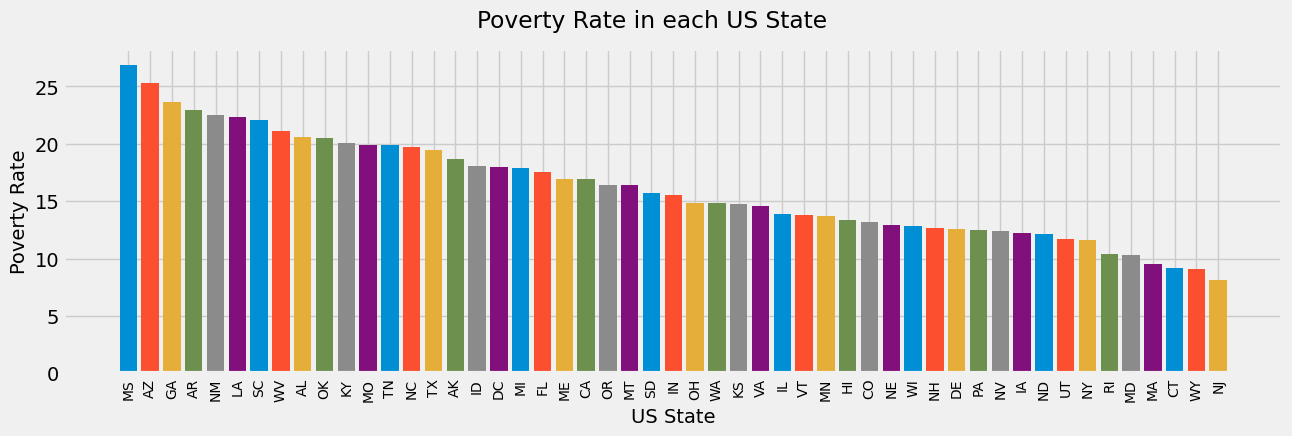

In [23]:
# plt.style.use('seaborn-deep')

plt.figure(figsize=(14,4))
plt.suptitle('Poverty Rate in each US State')
plt.ylabel('Poverty Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

for n in range(len(poverty)):
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=14)
    plt.bar(poverty.index[n], poverty.iloc[n])

plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [24]:
graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False)
graduation= graduation.rename_axis('Geographic Area').reset_index(name='rate')
graduation.head()

Geographic Area  rate
0              MA 92.03
1              HI 91.67
2              CT 91.59
3              ME 91.43
4              NH 90.71

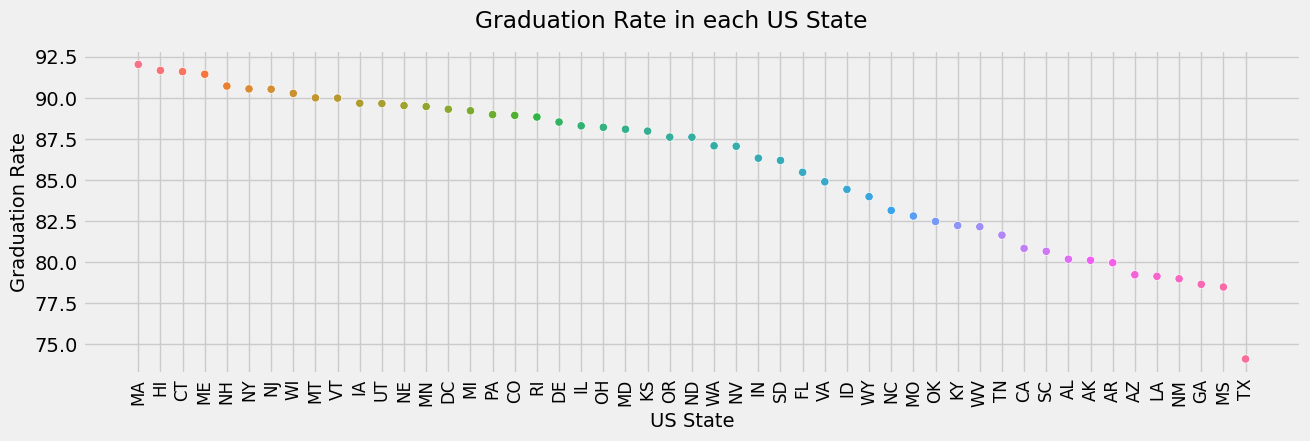

In [25]:
plt.figure(figsize=(14,4))
plt.suptitle('Graduation Rate in each US State')
plt.ylabel('Graduation Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=14)

sns.scatterplot(data=graduation, x='Geographic Area', y="rate", hue='Geographic Area')
plt.legend().remove()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [129]:
graduation_vs = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()
poverty_vs = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()

In [130]:
# merged = pd.concat([poverty_vs,graduation_vs], axis=1)

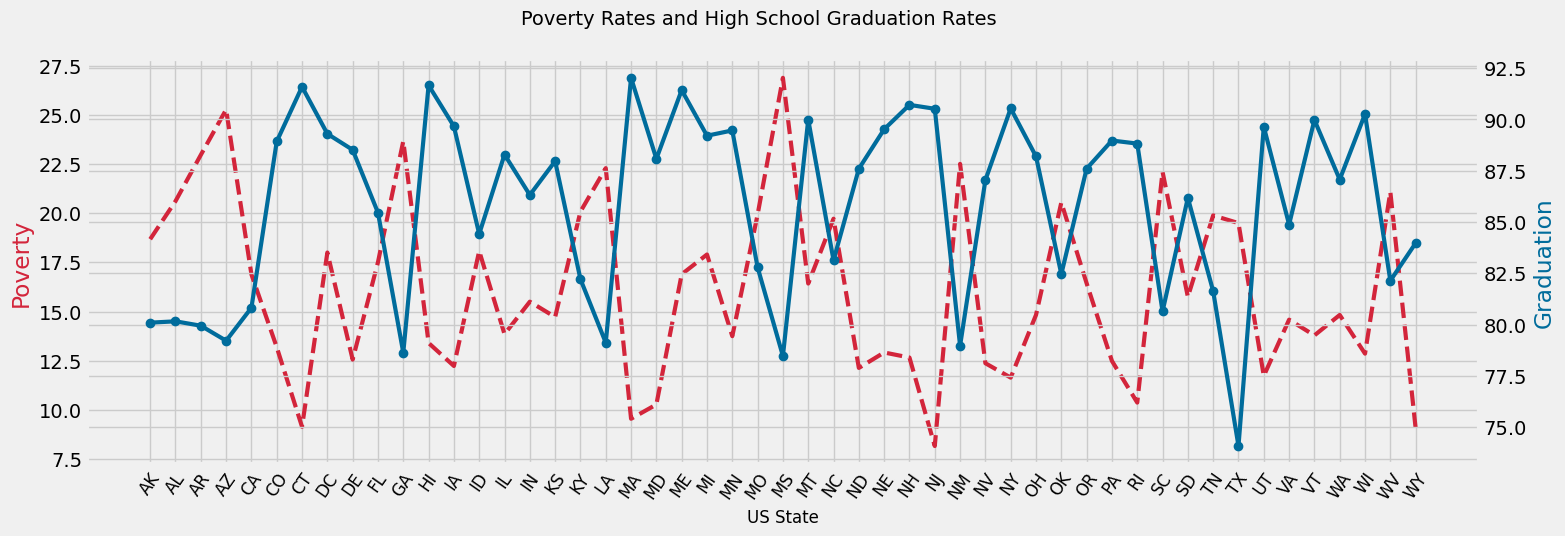

In [131]:
plt.figure(figsize=(16,5))
plt.suptitle('Poverty Rates and High School Graduation Rates', fontsize=14)
plt.xlabel('US State', fontsize=12)
plt.xticks(fontsize=12, rotation=55)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Poverty', color='#D3253B') # can use a HEX code
ax2.set_ylabel('Graduation', color='#006C9C') # or a named colour
 
ax1.plot(poverty_vs.index, poverty_vs, color='#D3253B', linewidth=3, linestyle='--')
ax2.plot(graduation_vs.index, graduation_vs, color='#006C9C', linewidth=3, marker='o')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [132]:
merged = pd.concat([poverty_vs,graduation_vs], axis=1)

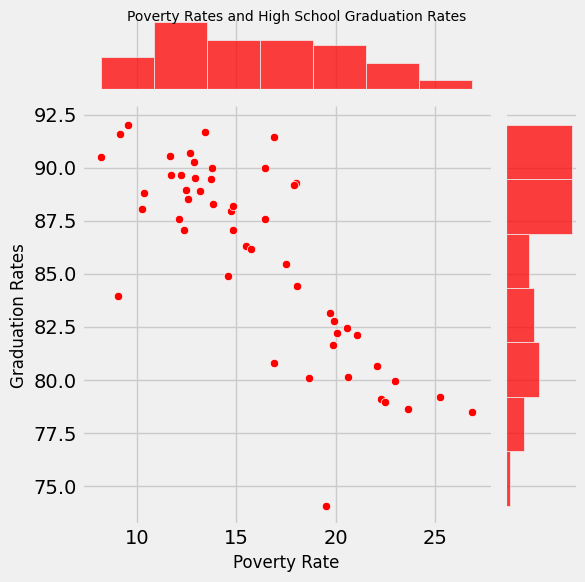

In [161]:
graph = sns.jointplot(x=merged.poverty_rate, y=merged.percent_completed_hs, color='r')
graph.x = poverty_vs.index
graph.y = graduation_vs.index

plt.suptitle('Poverty Rates and High School Graduation Rates', fontsize=10)
plt.xlabel('Poverty Rate', fontsize=12)
plt.ylabel('Graduation Rates', fontsize=12)
# graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [31]:
# sns.lmplot(merged, x='poverty_rate', y='percent_completed_hs')
# # plt.suptitle('Poverty Rates and High School Graduation Rates', fontsize=14)
# plt.xlabel('Poverty Rate', fontsize=12)
# plt.ylabel('Graduation Rates', fontsize=12)

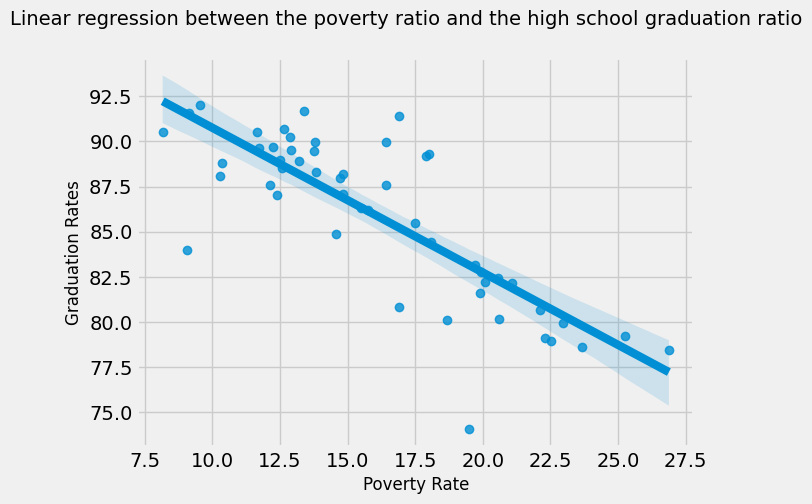

In [163]:
plt.suptitle('Linear regression between the poverty ratio and the high school graduation ratio', fontsize=14)
sns.regplot(merged, x='poverty_rate', y='percent_completed_hs')
# plt.suptitle('Poverty Rates and High School Graduation Rates', fontsize=14)
plt.xlabel('Poverty Rate', fontsize=12)
plt.ylabel('Graduation Rates', fontsize=12)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [33]:
shares_dict = {"share_white" : "White",
              "share_black" : "Black",
              "share_hispanic" : "Hispanic",
              "share_asian" : "Asian",
              "share_native_american" : "Native American",
             } 

In [34]:
racial_share = df_share_race_city.groupby(["Geographic area"]).sum()
racial_share.drop(columns=['City'], inplace=True)
racial_share.rename(columns=shares_dict, inplace=True)
racial_share.head()

White     Black  Native American    Asian  Hispanic
Geographic area                                                         
AK               16,068.80    199.70        16,144.40   488.70    756.50
AL               41,909.20 13,480.30           381.10   277.30  1,722.50
AR               42,441.20  8,816.60           411.10   258.10  2,311.70
AZ               27,028.00    430.50        12,894.00   327.70  9,085.20
CA              108,949.30  4,081.10         2,612.20 8,441.40 44,949.20

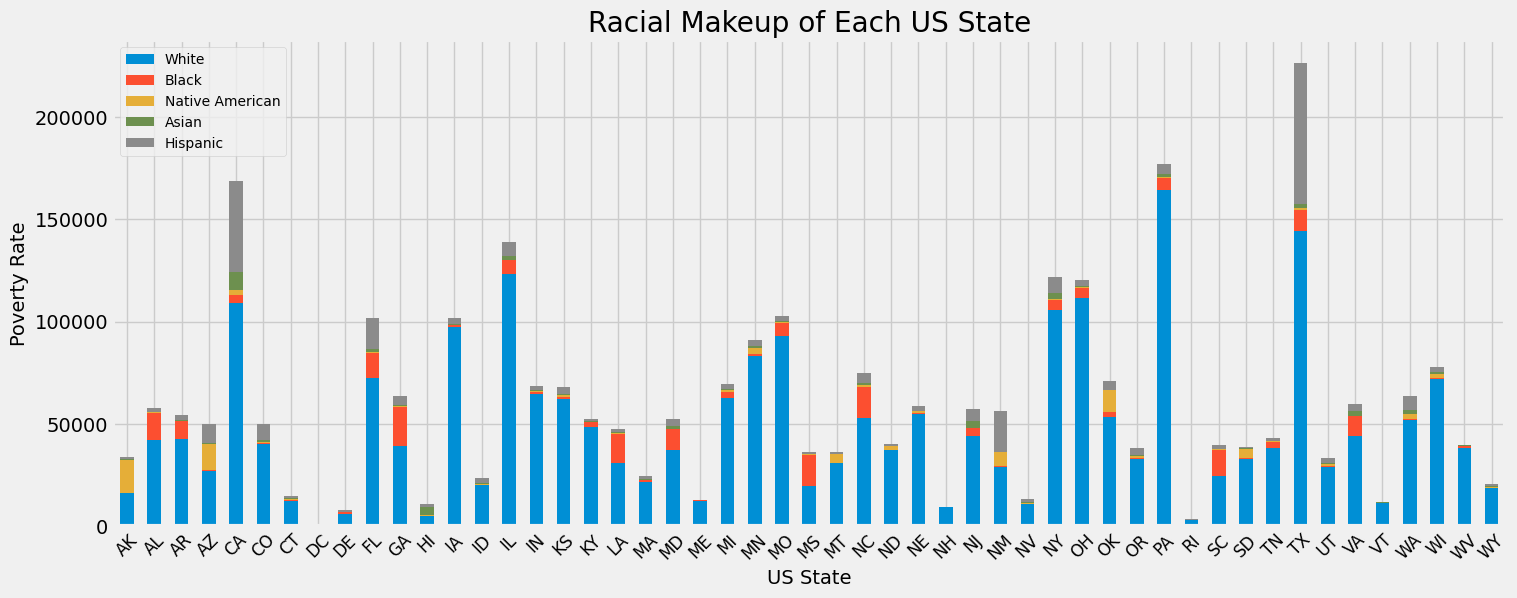

In [35]:
# plt.figure(figsize=(14,4))
 
racial_share.reset_index().plot(x="Geographic area", kind="bar", 
                                title='Racial Makeup of Each US State',
                                figsize=(16,6),
                                stacked=True)

plt.ylabel('Poverty Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.legend(loc="upper left",fontsize="10" )#, labels = shares_dict.values())

plt.show()

# Create Donut Chart by of People Killed by Race

In [135]:
races_dict = {"W" : "White",
              "B" : "black",
              "H" : "Hispanic",
              "A" : "Asian",
              "N" : "Native American",
              "O" : "Other",
             } 

df_fatalities['race'] = df_fatalities['race'].map(races_dict)


In [136]:
deaths_per_race =  df_fatalities.race.value_counts().rename_axis('race').reset_index(name="counts")
deaths_per_race

race  counts
0            White    1201
1            black     618
2         Hispanic     423
3            Asian      39
4  Native American      31
5            Other      28

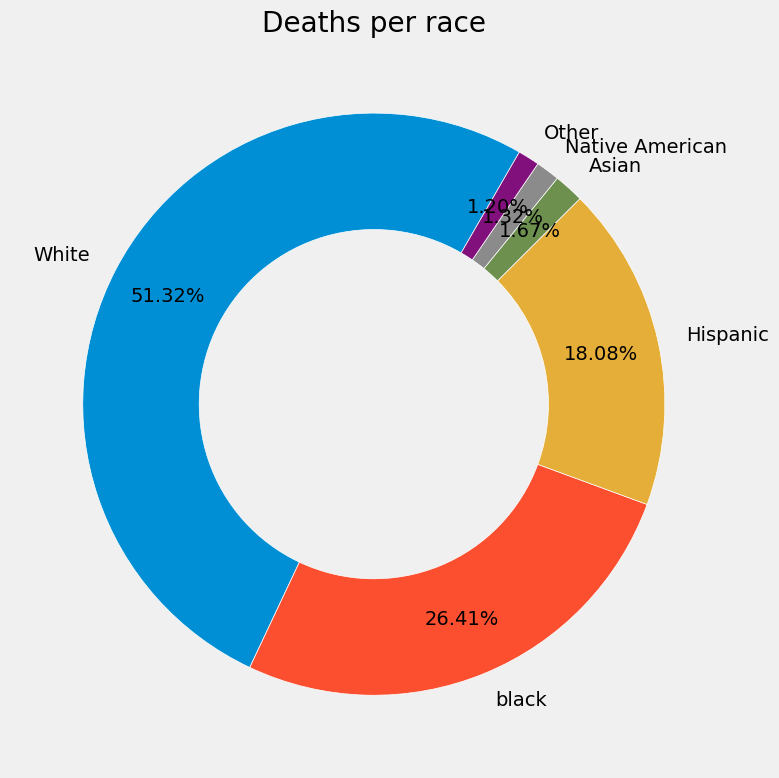

In [139]:
plt.figure(figsize=(10,8))

plt.pie(
    deaths_per_race.counts, 
    labels=deaths_per_race.race, 
    radius = 1,
    startangle=60,
    autopct='%.2f%%',
    wedgeprops=dict(width=0.4, edgecolor='w'),
    pctdistance=0.8, 
)
plt.title("Deaths per race")
plt.tight_layout()
# ax.legend(title="Race")
plt.show()


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [141]:
deaths_per_gender =  df_fatalities['gender'].value_counts()

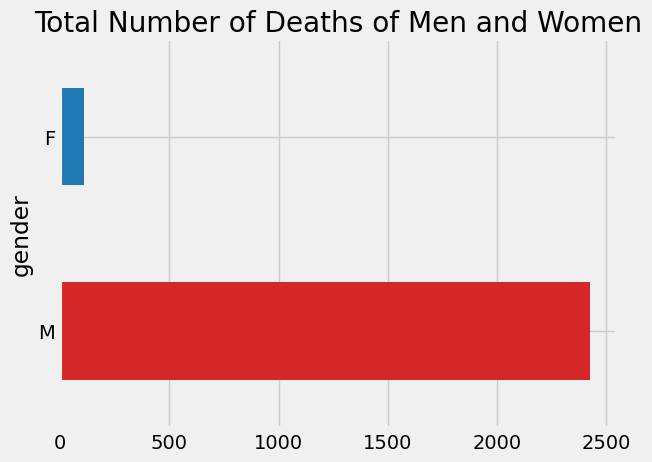

In [149]:
df_fatalities['gender'].value_counts().plot(kind='barh',
                                            title="Total Number of Deaths of Men and Women",
                                            color=['tab:red','tab:blue'])

plt.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [41]:
manner_of_death_by_gender = df_fatalities[['gender','age','manner_of_death']]
manner_of_death_by_gender.head()

gender   age   manner_of_death
0      M 53.00              shot
1      M 47.00              shot
2      M 23.00  shot and Tasered
3      M 32.00              shot
4      M 39.00              shot

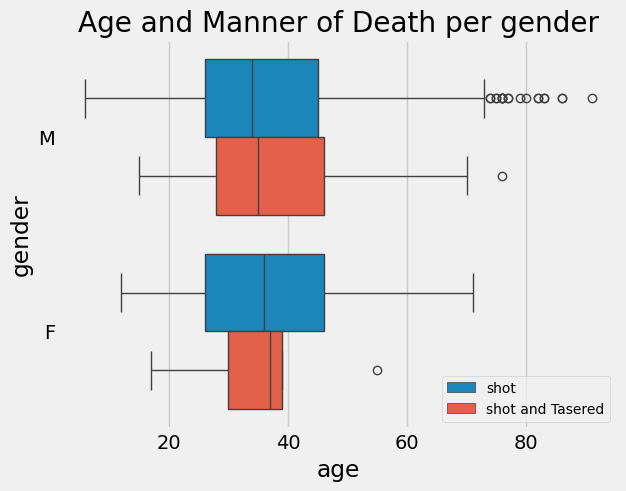

In [42]:
sns.boxplot(data=manner_of_death_by_gender, x="age", y="gender", hue="manner_of_death")
plt.title('Age and Manner of Death per gender')
plt.legend(fontsize="10")

# Were People Armed? 
How many of the people killed by police were armed with guns versus unarmed? 

In [43]:
# df_fatalities.info()

In [44]:
df_fatalities.fillna({'armed':"undetermined"}, inplace=True)

In [45]:
gun_armed_count = df_fatalities[df_fatalities['armed'].str.contains('gun')]['armed'].count()
print(gun_armed_count)
unarmed_count = df_fatalities[df_fatalities['armed']=="unarmed"]['armed'].count()
print(unarmed_count)

1411
171


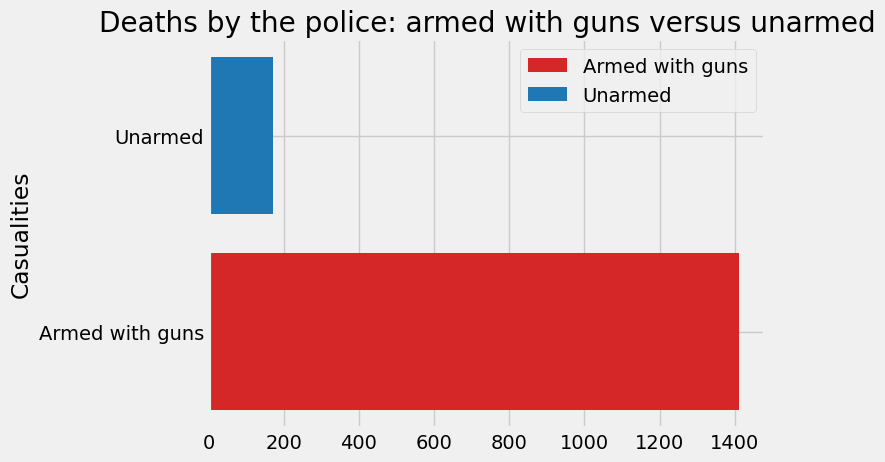

In [46]:
fig, ax = plt.subplots()
bar_labels = ['Armed with guns', 'Unarmed']
counts= [gun_armed_count, unarmed_count]
colors = ['tab:red', 'tab:blue']
ax.barh(bar_labels, counts,  label=bar_labels, color=colors)


ax.set_ylabel('Casualities')
ax.set_title('Deaths by the police: armed with guns versus unarmed')
ax.legend(loc='upper right')

plt.show()


In [47]:
weapons_counts = df_fatalities[df_fatalities['armed'] != 'unarmed']['armed'].value_counts()

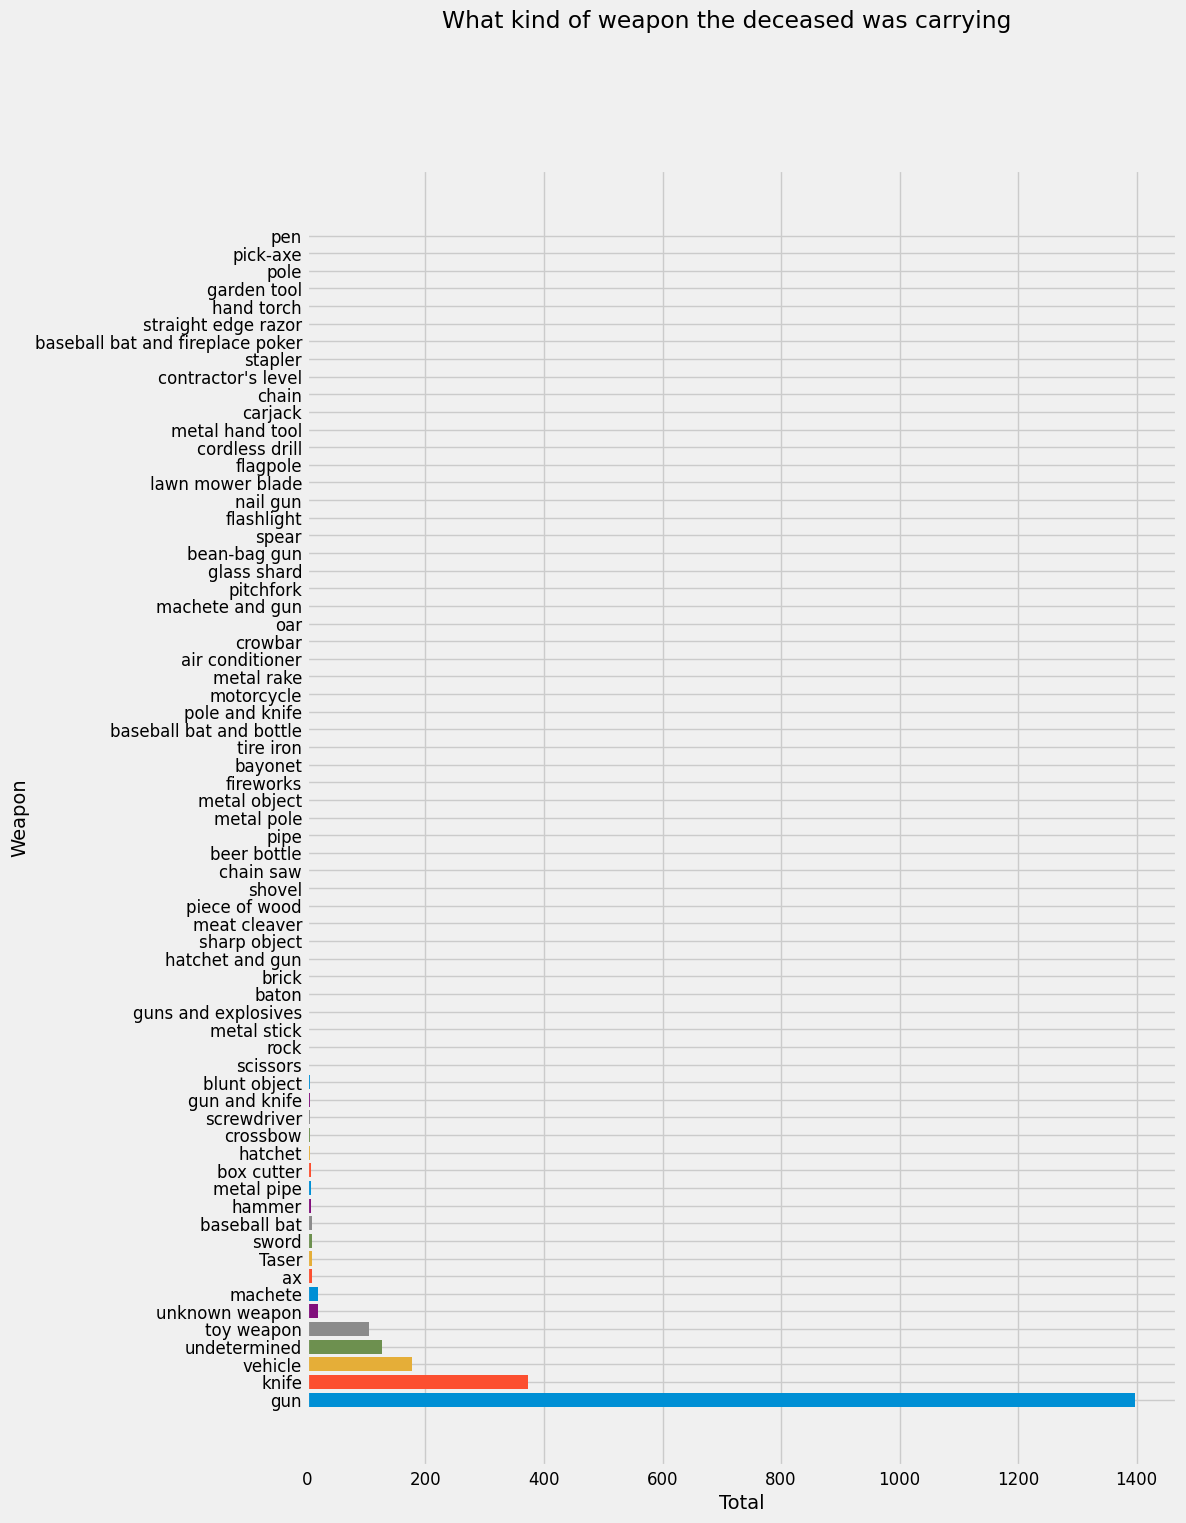

In [48]:
plt.figure(figsize=(10,16))
plt.suptitle('What kind of weapon the deceased was carrying')
plt.ylabel('Weapon', fontsize=14)
plt.xlabel('Total', fontsize=14)

for n in range(len(weapons_counts)):
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.barh(weapons_counts.index[n], weapons_counts.iloc[n])

plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [49]:
# df_fatalities.age = 
df_fatalities.loc[(df_fatalities["age"] == 0), "age"] = np.nan

In [50]:
df_fatalities.shape

(2535, 14)

In [51]:
per_under_25 = {"Under 25 years": df_fatalities[df_fatalities["age"] < 25]["id"].count() / df_fatalities["id"].count(),
                "Over 25 years" : df_fatalities[df_fatalities["age"] >= 25]["id"].count() /df_fatalities["id"].count()
}

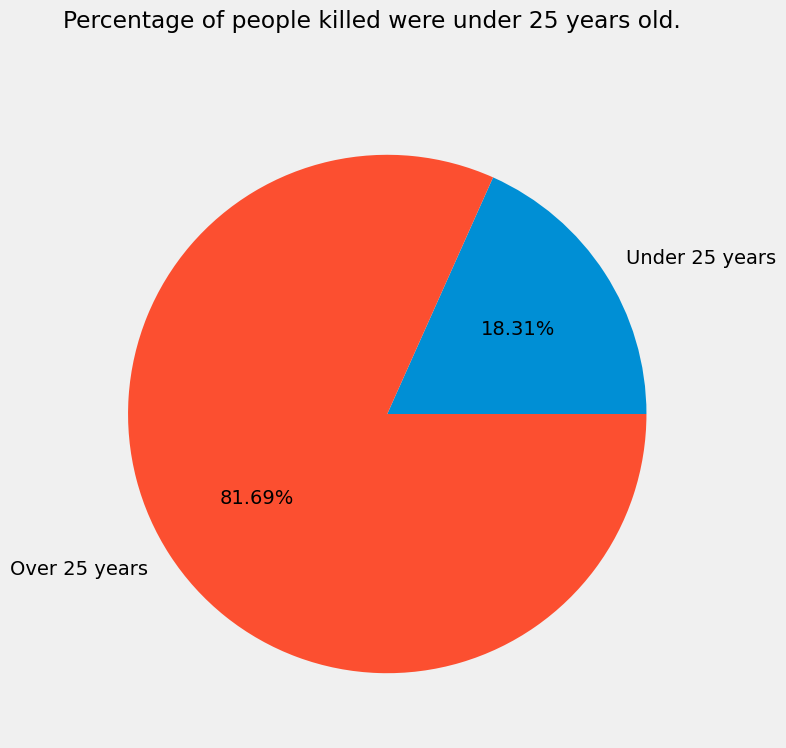

In [52]:
plt.figure(figsize=(10,8))
plt.suptitle("Percentage of people killed were under 25 years old.")

plt.pie(per_under_25.values(), 
       labels=per_under_25.keys(),
       autopct='%.2f%%',)
plt.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

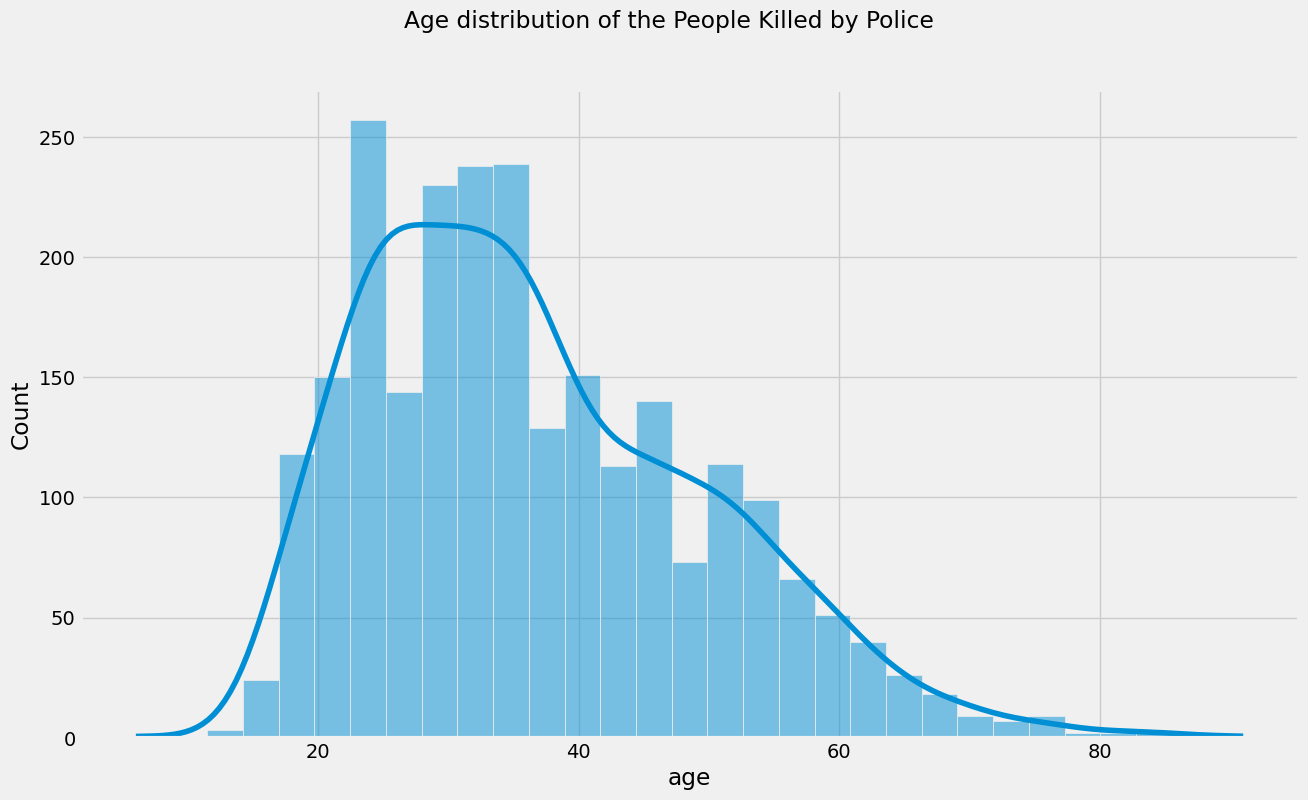

In [53]:
plt.figure(figsize=(14,8))
plt.suptitle('Age distribution of the People Killed by Police')
sns.histplot(data=df_fatalities, x="age", kde=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

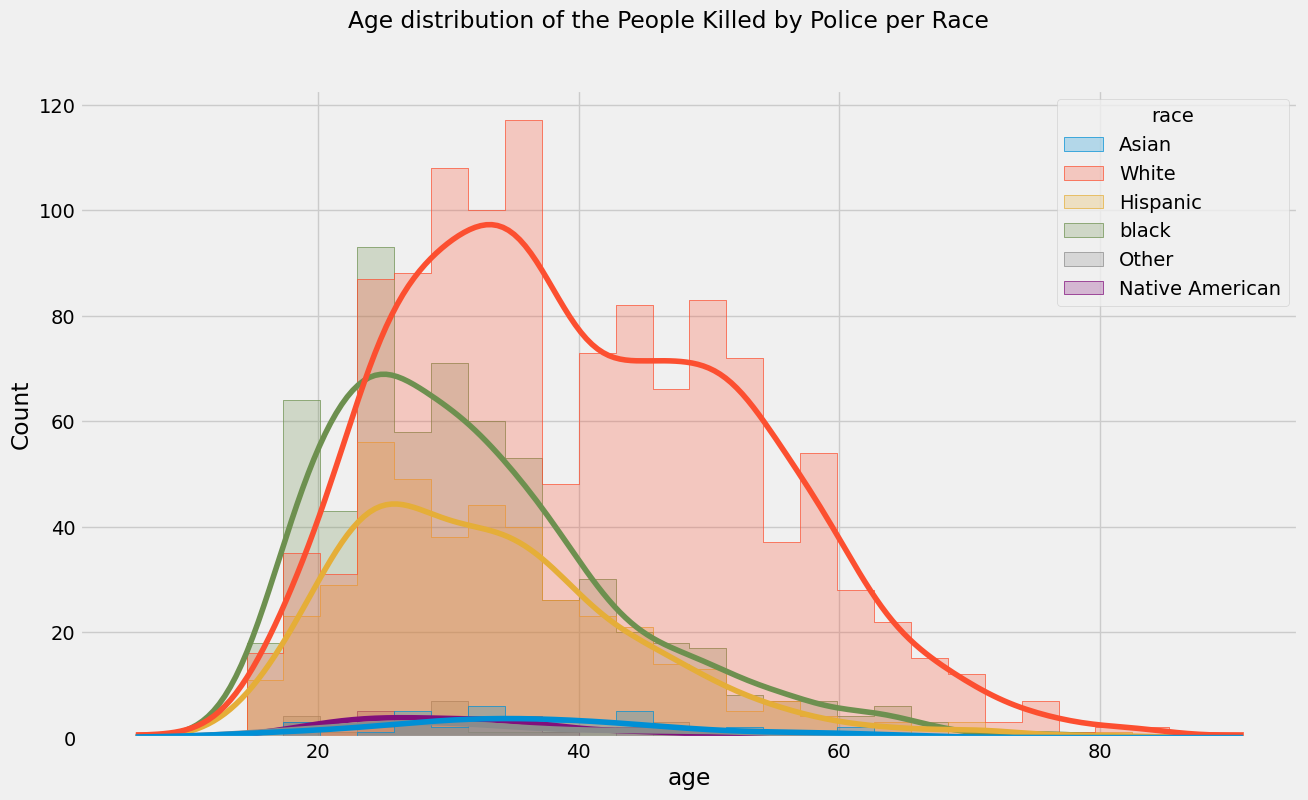

In [54]:
plt.figure(figsize=(14,8))
plt.suptitle('Age distribution of the People Killed by Police per Race')
sns.histplot(data=df_fatalities, x="age", kde=True, hue='race', element='step')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

<Axes: ylabel='race'>

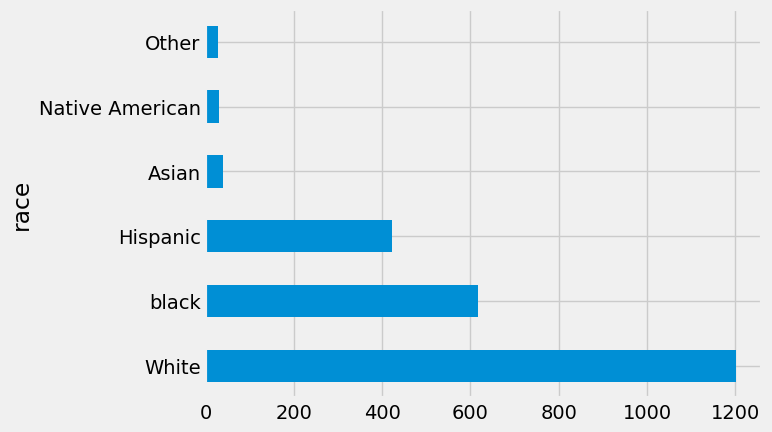

In [55]:
total_per_race = df_fatalities.groupby('race').size().sort_values(ascending=False)
total_per_race.plot(kind="barh")

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [56]:
df_fatalities['signs_of_mental_illness'].value_counts().index

Index([False, True], dtype='bool', name='signs_of_mental_illness')

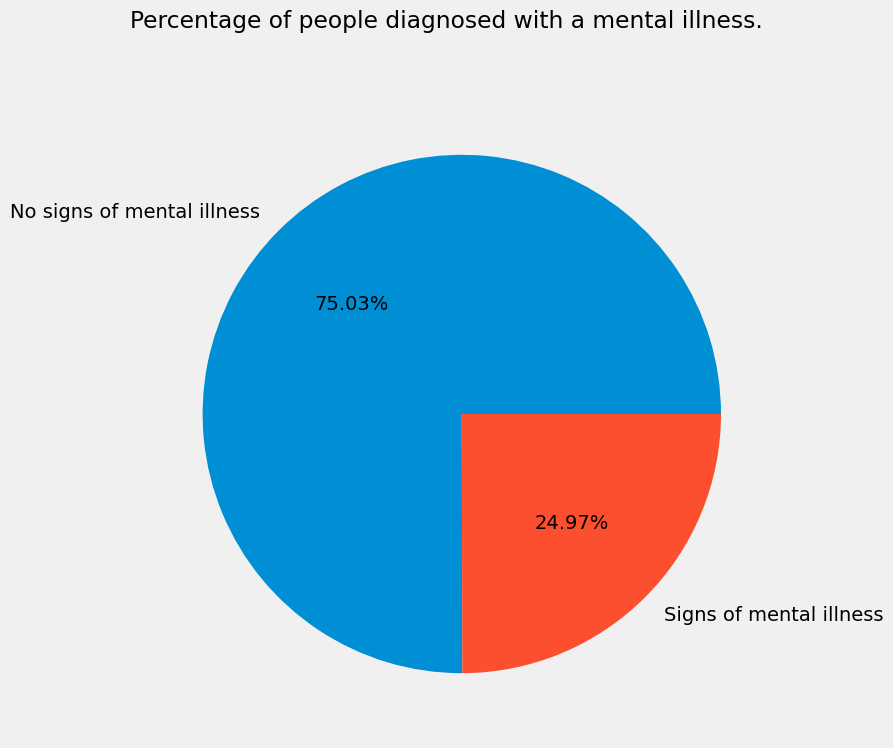

In [57]:
# df_fatalities['signs_of_mental_illness'].plot(kind="pie")
plt.figure(figsize=(10,8))
plt.suptitle("Percentage of people diagnosed with a mental illness.")

plt.pie(df_fatalities['signs_of_mental_illness'].value_counts(), 
       labels=['No signs of mental illness','Signs of mental illness'],
       autopct='%.2f%%',)
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [58]:
top_10_dangerous_cities = df_fatalities.groupby(['state','city']).size().sort_values(ascending=False).head(10).reset_index(name="counts")
top_10_dangerous_cities

state         city  counts
0    CA  Los Angeles      39
1    AZ      Phoenix      31
2    TX      Houston      26
3    IL      Chicago      25
4    NV    Las Vegas      21
5    TX  San Antonio      20
6    FL        Miami      17
7    OH     Columbus      17
8    TX       Austin      16
9    MO    St. Louis      15

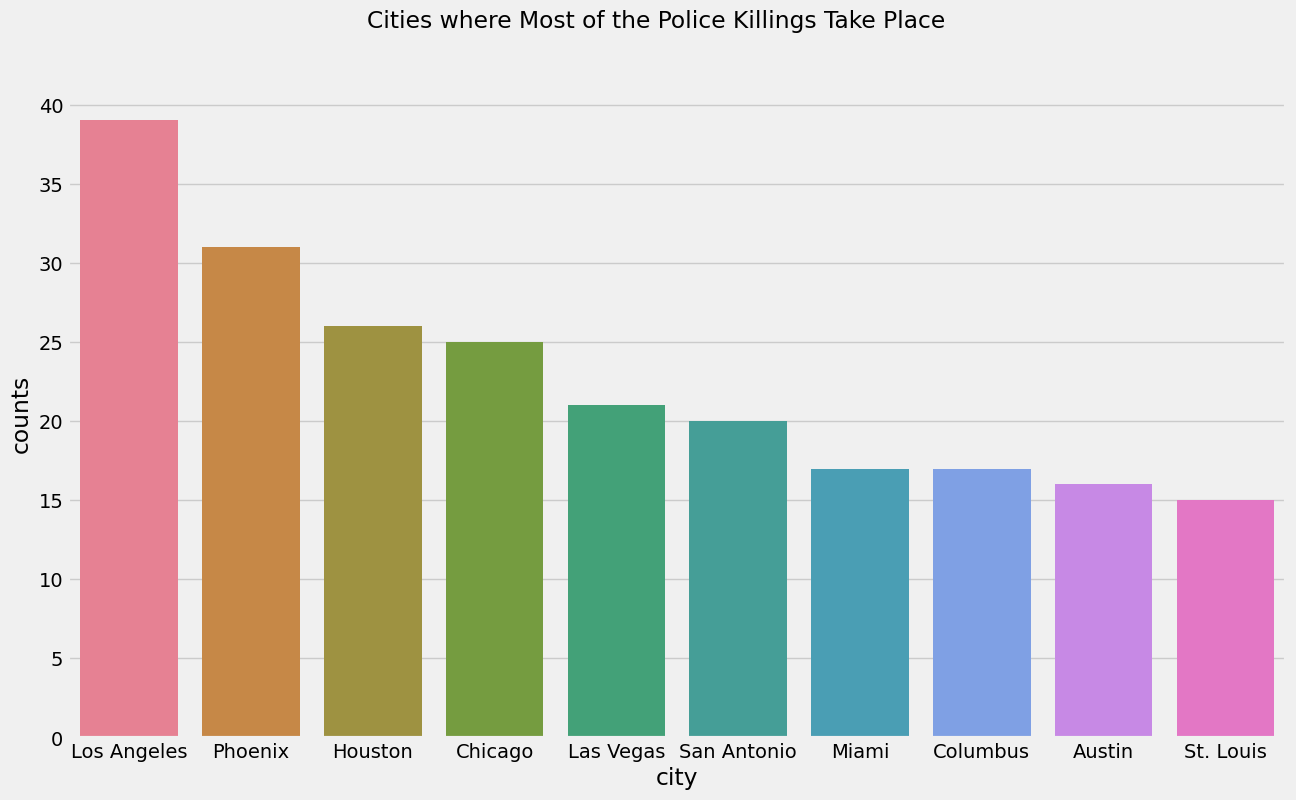

In [59]:
plt.figure(figsize=(14,8))
plt.suptitle('Cities where Most of the Police Killings Take Place')
sns.barplot(data=top_10_dangerous_cities, x="city", y="counts", hue="city")
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [60]:
list_cities = ['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
               'San Antonio', 'Miami', 'Columbus', 'Austin', 'St. Louis']

In [61]:
df = df_fatalities[['city', 'race']]
top_10_cities = df.loc[df["city"].isin(list_cities)].value_counts().to_frame()
top_10_cities.head()

count
city        race           
Chicago     black        21
Los Angeles Hispanic     19
Houston     black        15
Austin      White        13
San Antonio Hispanic     12

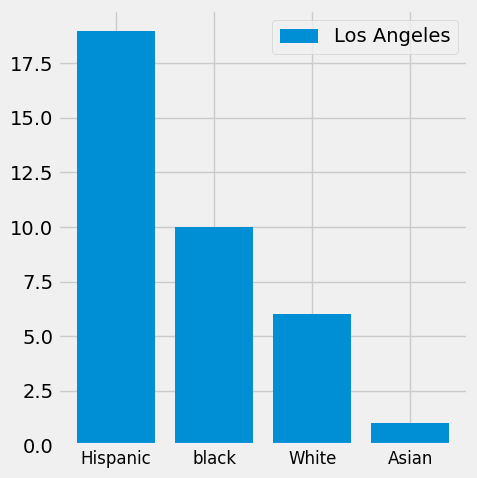

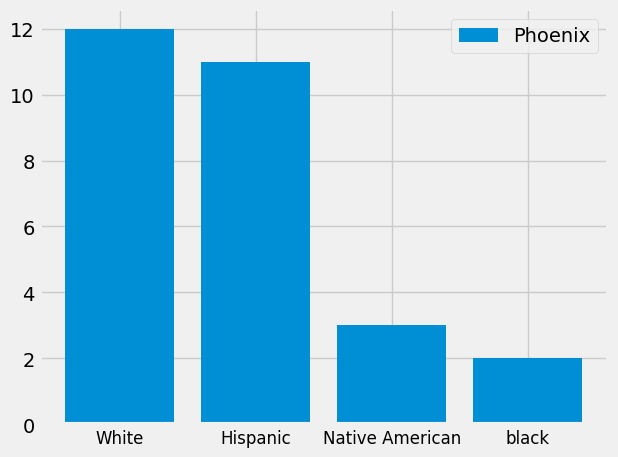

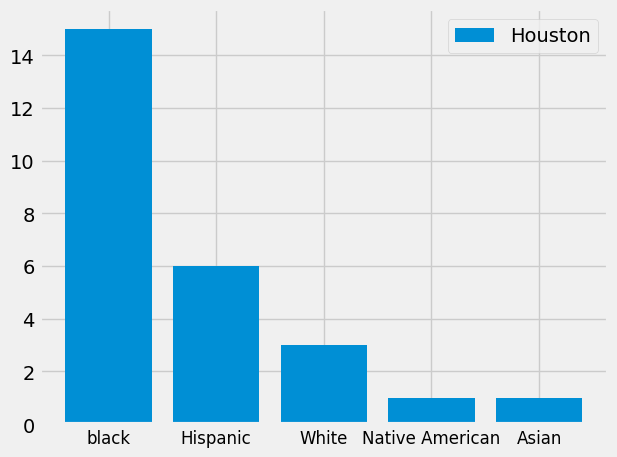

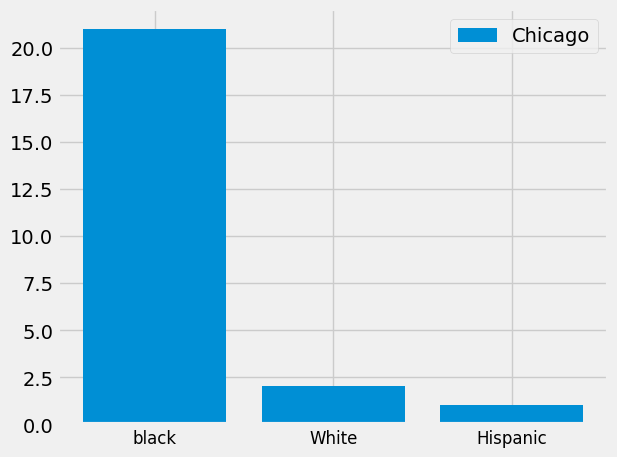

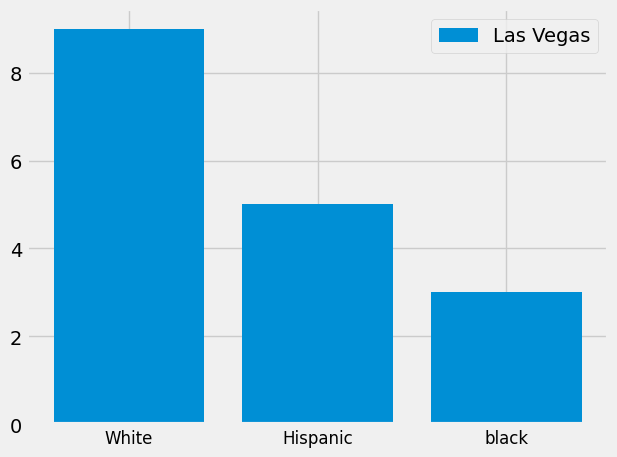

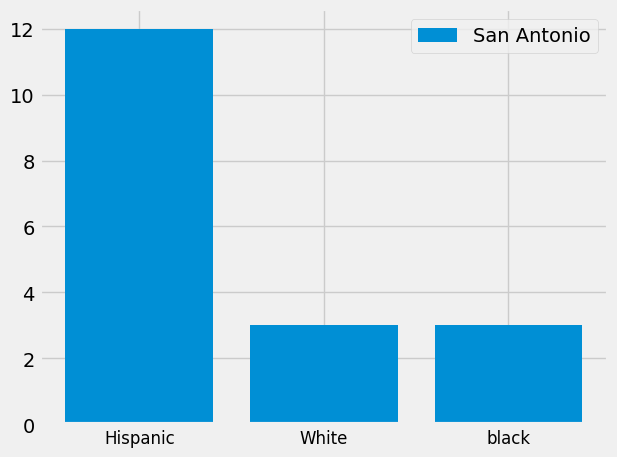

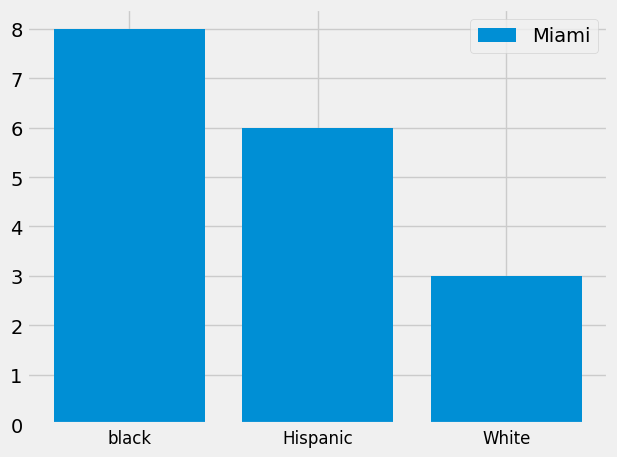

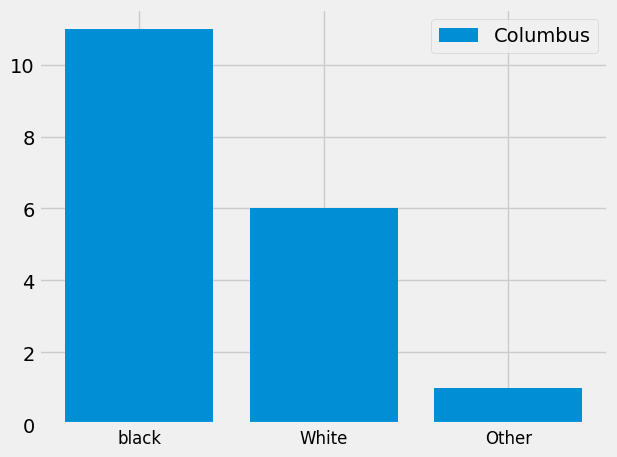

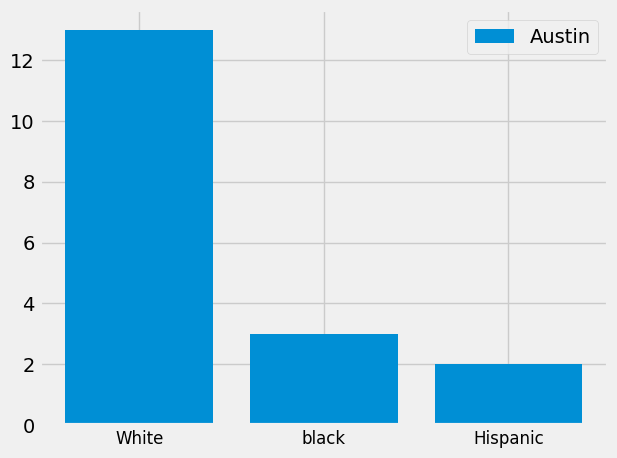

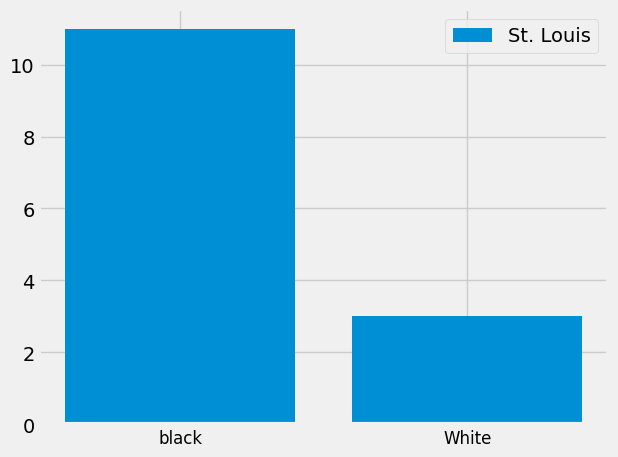

In [62]:
plt.figure(figsize=(5,5))
for city in top_10_dangerous_cities['city'].values:
    city_share = top_10_cities.xs(city)
    plt.bar(city_share.index,
            city_share["count"],
            label=city)
    plt.xticks(fontsize=12)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [63]:
us_states = df_fatalities.groupby('state').size().sort_values(ascending=False)
us_states.head()

state
CA    424
TX    225
FL    154
AZ    118
OH     79
dtype: int64

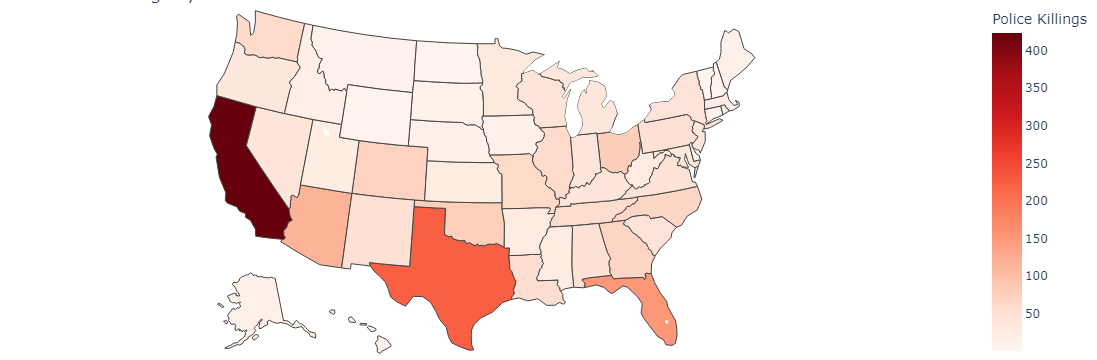

In [64]:
fig = go.Figure(data=go.Choropleth(
                locations=us_states.index,
                z = us_states, 
                locationmode = 'USA-states', 
                colorscale = 'Reds',
                colorbar_title = "Police Killings",
                ))

fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    title_text = 'Police Killings by US State',
    geo_scope='usa',
)

fig.show()

In [65]:
# fig.show('svg')

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [99]:
monthly_fatalities = df_fatalities.copy()
monthly_fatalities['date'] = pd.to_datetime(monthly_fatalities['date']).dt.to_period('M')
monthly_fatalities.date = monthly_fatalities.date.astype(str)

In [100]:
history = monthly_fatalities.groupby('date').size()
history.index

Index(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='date')

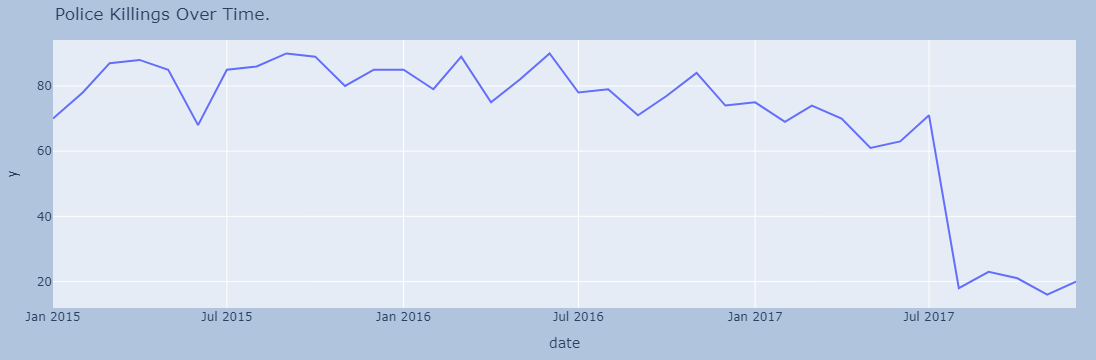

In [106]:
fig = px.line(history, 
              x=history.index, 
              y=history.values,
              title="Police Killings Over Time.")
fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=15),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).